**Part1**

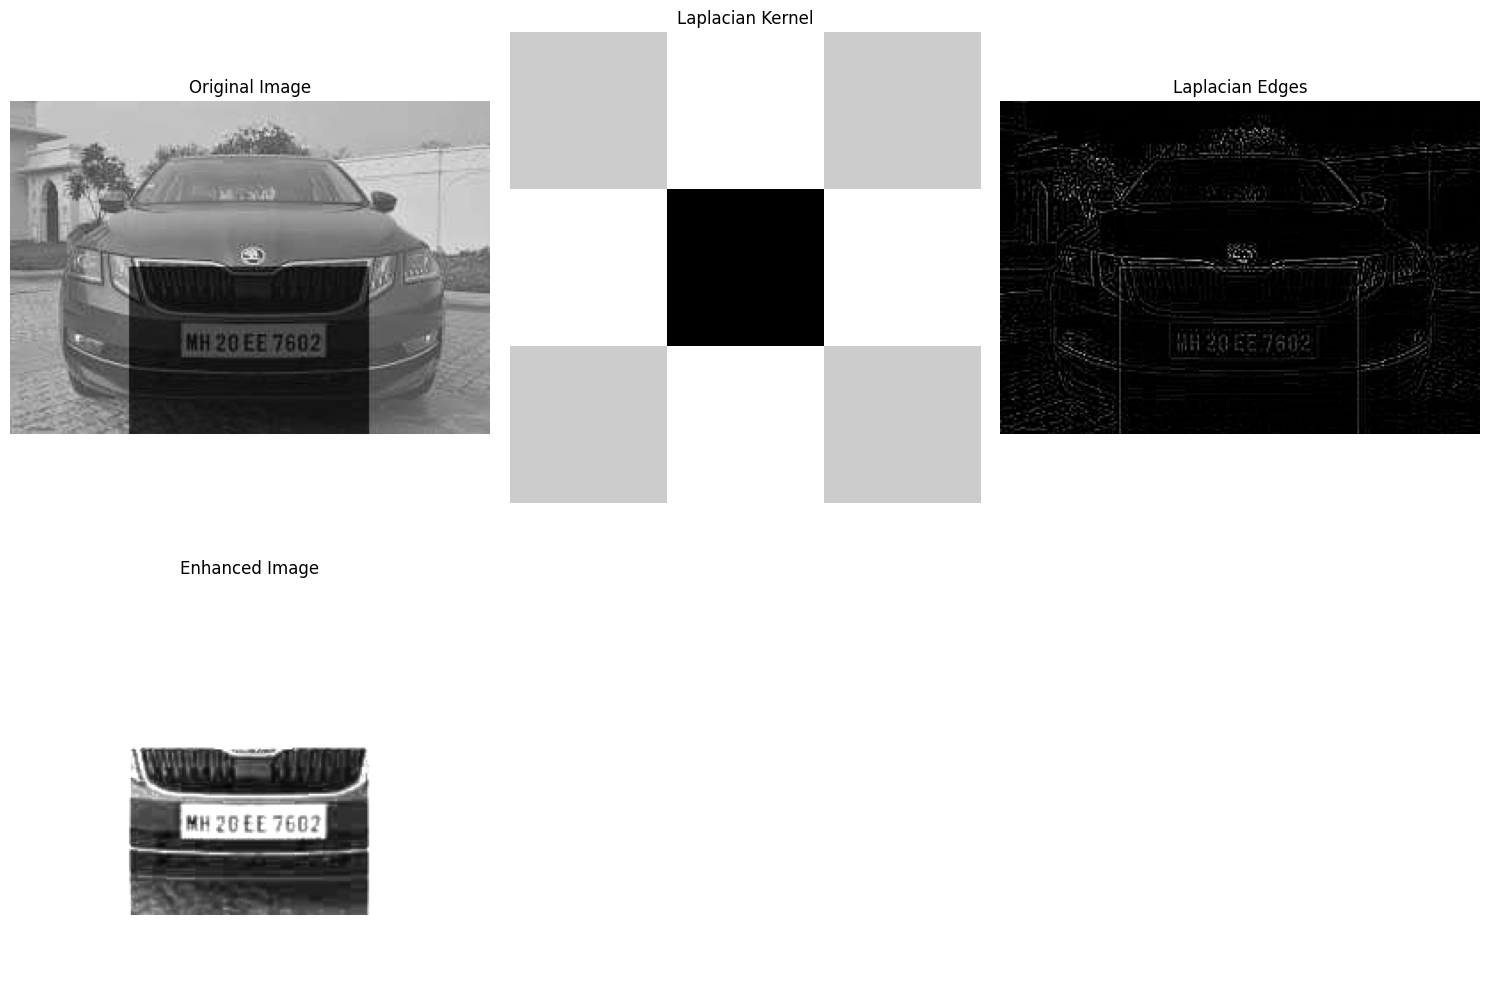

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('./car.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print("Error: Image not loaded. Please check the filename and path.")
else:
    # Define the Laplacian kernel
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]], dtype=np.float32)  # Laplacian kernel

    # Apply the Laplacian filter to extract edges
    edges = cv2.filter2D(image, -1, laplacian_kernel)

    # Enhance edges by adding the extracted edges to the original image
    enhanced_image = cv2.addWeighted(image, 4.75, edges, 1.5, 0)

    # Plot the results
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # Display original image
    axs[0, 0].imshow(image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Display Laplacian kernel
    axs[0, 1].imshow(laplacian_kernel, cmap='gray')
    axs[0, 1].set_title('Laplacian Kernel')
    axs[0, 1].axis('off')

    # Display edges extracted by Laplacian
    axs[0, 2].imshow(edges, cmap='gray')
    axs[0, 2].set_title('Laplacian Edges')
    axs[0, 2].axis('off')

    # Display enhanced image
    axs[1, 0].imshow(enhanced_image, cmap='gray')
    axs[1, 0].set_title('Enhanced Image')
    axs[1, 0].axis('off')

    # Hide the empty plots
    for ax in axs.flat:
        if not ax.has_data():
            ax.axis('off')

    plt.tight_layout()
    plt.show()

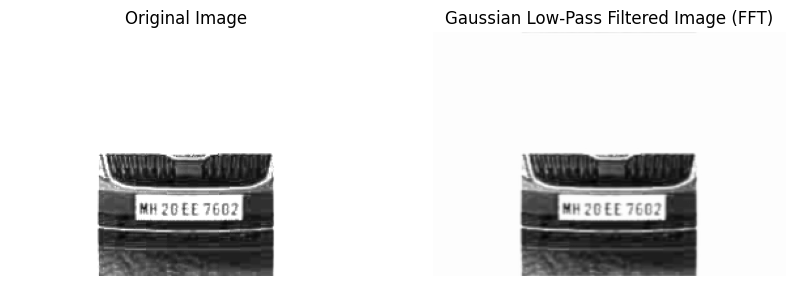

In [ ]:
image = enhanced_image

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2  # Center of the image

# Perform FFT and shift the zero frequency component to the center
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Create a Gaussian low-pass filter mask
sigma = 75  # Adjust this value for more or less blurring
x = np.linspace(-ccol, ccol, cols)
y = np.linspace(-crow, crow, rows)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Apply the mask to the shifted DFT
filtered_dft = dft_shift * gaussian_mask

# Inverse FFT to convert back to the spatial domain
inverse_shift = np.fft.ifftshift(filtered_dft)
filtered_image = np.fft.ifft2(inverse_shift)
filtered_image = np.abs(filtered_image)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Low-Pass Filtered Image (FFT)")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()


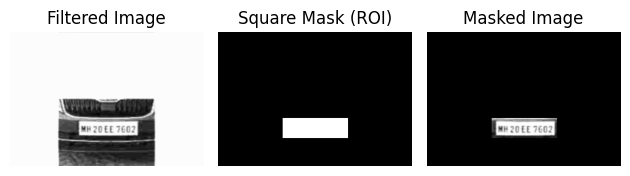

In [ ]:
# Convert the filtered image to uint8 format for bitwise operations
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Part 1: Create and Display the Mask (Square ROI)
mask = np.zeros(filtered_image.shape, dtype="uint8")

start_x = 90
start_y = 100 + 20
end_x = 180
end_y = filtered_image.shape[0] - 40

cv2.rectangle(mask, (start_x, start_y), (end_x, end_y), 255, -1)  # -1 means filled rectangle

# Display the mask
plt.subplot(1, 3, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Square Mask (ROI)')
plt.axis('off')

# Part 3: AND (Masking an ROI)
masked_image = cv2.bitwise_and(filtered_image, mask)

# Display the masked image
plt.subplot(1, 3, 3)
plt.imshow(masked_image, cmap='gray')
plt.title('Masked Image')
plt.axis('off')

plt.tight_layout()
plt.show()


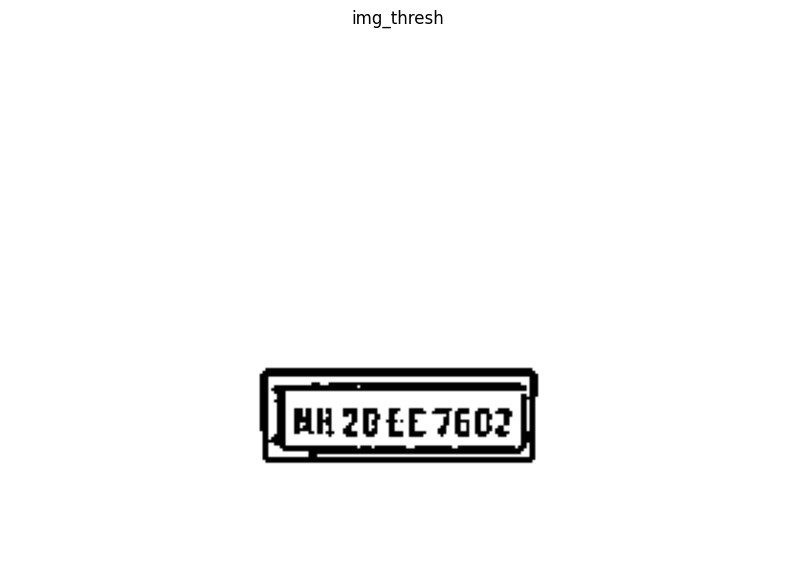

In [ ]:
masked_image = masked_image.astype(np.uint8)
img_thresh = cv2.adaptiveThreshold(masked_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)
plt.figure(figsize=(10, 8))
plt.title('img_thresh')
plt.imshow(img_thresh, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
%pip install pytesseract
!apt-get install -y tesseract-ocr

# Import pytesseract
import pytesseract

# Define OCR configuration
custom_config = r' --psm 9 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

# Apply OCR on the processed image
text = pytesseract.image_to_string(img_thresh, config=custom_config)
print("Extracted Text:", text)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Extracted Text: MH20EE7602

